# Our Data Deep Network Modifications Results

## Requirements from google doc, slightly updated


* <span class='finished'>Deep5 with log(mean) pooling and square</span>
* <span class='finished'>Deep5 with max pooling and square (only if we already have it)</span>
* <span class='finished'>Deep5 with max pooling and elu and two 5x1 filters instead of one 10x1</span>
* <span class='finished'>Best of the above: Tied loss or not</span>
* <span class='finished'>(Deep5 with max pooling and elu -> split/don’t split first layer filter)</span>
    


## Overview

Baseline is max(elu) with split first convolution, 10x1 filters, tied loss, dropout and batch norm.


Std is standard deviations of differences (std over the 9 datasets). Perm is p-value of one-sided permutation/randomization test. I bolded those below 0.01.

|Variant|Acc|Diff|Std|Perm|
|-|
|Baseline (max(elu))|70.3|-|-|-|
|log(mean(square))|61.8|-8.5|6.1|**0.002**|
|log(mean(square))|33.5|-36.8|20.2|**0.002**|
|log(max(square)) first|61.6|-8.7|5.3|**0.004**|
|log(max(square)) all|29.2|-41.1|15.6|**0.002**|
|No Dropout|63.0|-7.3|3.8|**0.002**|
|No Batch Norm|65.6|-4.7|10.0|0.11|
|No Batch Norm No Dropout|62.1|-8.2|11.2|0.04|
|Only Crossentropy|70.1|-0.3|4.6|0.43|
|Single first conv|71.3|1.0|1.4|0.05|
|6x6 filters|69.6|-0.7|8.9|0.42|


## Details
I additionally show a plot with the baseline accuracies vs the variant accuracies: Blue dots above black dotted line are datasets where variant is better, below line variant is worse

## Nonlinearities

### Log(Mean(Square)) first conv/pool

|Baseline (max(elu))|log(mean(square))|Diff|Std|Perm|
|-|
|70.3|61.8|-8.5|6.1|0.001953|


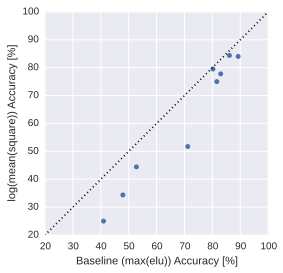

In [65]:
show_results(misclasses_baseline, misclasses_square_mean_log, 
                                second_name='log(mean(square))')

### Log(Mean(Square)) all layers

|Baseline (max(elu))|log(mean(square)) all layers|Diff|Std|Perm|
|-|
|70.3|33.5|-36.8|20.2|0.001953|


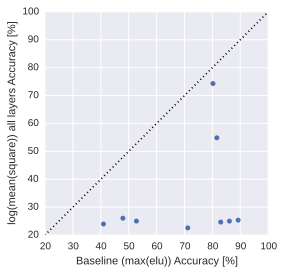

In [66]:
show_results(misclasses_baseline, misclasses_square_mean_log_all, 
                                second_name='log(mean(square)) all layers')

## log(max(square)) first layer

|Baseline (max(elu))|log(max(square)) first layer|Diff|Std|Perm|
|-|
|70.3|61.6|-8.7|5.3|0.003906|


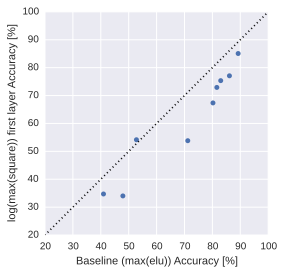

In [67]:
show_results(misclasses_baseline, misclasses_square_max_log,
             second_name='log(max(square)) first layer')

## log(max(square)) all layers

|Baseline (max(elu))|log(max(square)) all layers|Diff|Std|Perm|
|-|
|70.3|29.2|-41.1|15.6|0.001953|


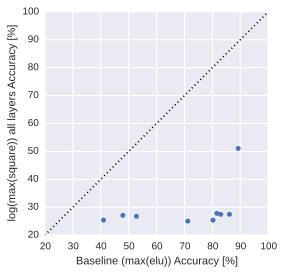

In [68]:
show_results(misclasses_baseline, misclasses_square_max_log_all,
             second_name='log(max(square)) all layers')

## Dropout

|Dropout|No Dropout|Diff|Std|Perm|
|-|
|70.3|63.0|-7.3|3.8|0.001953|


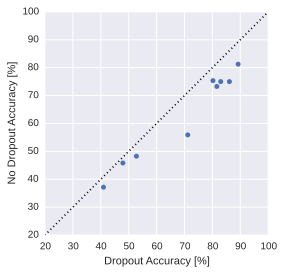

In [69]:
show_results(misclasses_baseline, misclasses_no_drop,
             'Dropout', 'No Dropout')

## Batch Norm

|Batch Norm|No Batch Norm|Diff|Std|Perm|
|-|
|70.3|65.6|-4.7|10.0|0.105469|


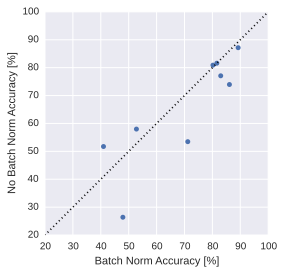

In [70]:
show_results(misclasses_baseline, misclasses_no_bnorm,
             'Batch Norm', 'No Batch Norm')

## No BatchNorm No Dropout 

|Batch Norm Dropout|No Batch Norm No Dropout|Diff|Std|Perm|
|-|
|70.3|62.1|-8.2|11.2|0.041016|


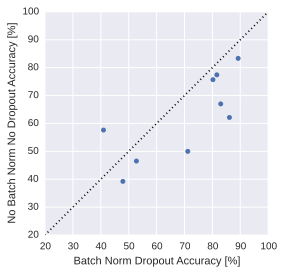

In [71]:
show_results(misclasses_baseline, misclasses_no_bnorm_no_drop,
             'Batch Norm Dropout', 'No Batch Norm No Dropout')

## Tied Loss/No Tied Loss

|Tied Loss + Crossentropy|Only Crossentropy|Diff|Std|Perm|
|-|
|70.3|70.1|-0.3|4.6|0.431641|


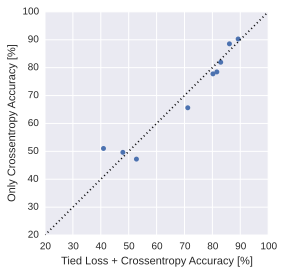

In [72]:
show_results(misclasses_baseline, misclasses_no_tied_loss,
             'Tied Loss + Crossentropy',  'Only Crossentropy')

## Split first convolution

|Split first Convolution|Single Convolution|Diff|Std|Perm|
|-|
|70.3|71.3|1.0|1.4|0.048828|


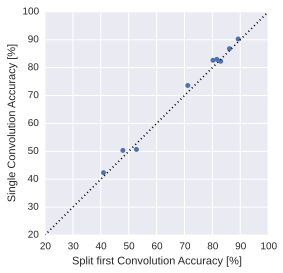

In [73]:
show_results(misclasses_baseline, misclasses_no_split_first, 
                                "Split first Convolution", "Single Convolution")

## 6x6 filters

|10x1 filters|6x6 filters|Diff|Std|Perm|
|-|
|70.3|69.6|-0.7|8.9|0.421875|


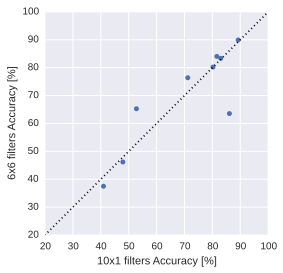

In [74]:
show_results(misclasses_baseline, misclasses_split_all_convs, 
                                "10x1 filters", "6x6 filters")

# Code

In [1]:
%%capture
import os
import site
site.addsitedir('/home/schirrmr/.local/lib/python2.7/site-packages/')
site.addsitedir('/usr/lib/pymodules/python2.7/')
os.sys.path.insert(0, '/home/schirrmr/braindecode/code/')
%cd /home/schirrmr/braindecode/code/braindecode/
assert 'THEANO_FLAGS' in os.environ
# switch to cpu
os.environ['THEANO_FLAGS'] = 'floatX=float32,device=cpu,nvcc.fastmath=True'
%load_ext autoreload
%autoreload 2
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

import matplotlib.lines as mlines
import seaborn
matplotlib.rcParams['figure.figsize'] = (12.0, 3.0)
matplotlib.rcParams['font.size'] = 7
seaborn.set_style('darkgrid')

from braindecode.scripts.print_results import ResultPrinter
from braindecode.csp.print_results import CSPResultPrinter
import logging
log = logging.getLogger()
log.setLevel("DEBUG")

In [2]:
%%html
<!-- css for lists-->
<style>

      .finished { color: darkgreen; }
</style>

In [3]:
from braindecode.results.results import (load_dataset_grouped_result_objects_for,
                                         get_final_misclasses,
                                         sort_results_by_filename, extract_single_group_result_sorted,
                                        extract_single_group_misclasses_sorted)
from braindecode.analysis.stats import perm_mean_diffs


from braindecode.analysis.plot_util import show_misclass_scatter_plot
def show_results(first_misclasses, second_misclasses, first_name='Baseline (max(elu))',
                 second_name=''):
   
    plot_misclass_scatter_with_name(first_misclasses, second_misclasses,
                                    first_name, second_name)
    diffs = perm_mean_diffs(first_misclasses,second_misclasses)

    actual_diff = np.mean(first_misclasses - second_misclasses)

    # one sided without checking direction before
    perm_p_val = (np.sum(abs(diffs) >= abs(actual_diff)) / 
            (float(len(diffs) * 2.0)))
    print("|{:s}|{:s}|{:s}|{:s}|{:s}|".format(first_name, second_name, "Diff", "Std", "Perm"))
    print("|-|")
    print("|{:.1f}|{:.1f}|{:.1f}|{:.1f}|{:f}|".format(100 * (1-np.mean(first_misclasses)), 
                                               100 * (1-np.mean(second_misclasses)),
                                               100 * actual_diff, # - to get accuracy from misclass
                                               100 * np.std(second_misclasses - first_misclasses),
                                                perm_p_val))
    
def plot_misclass_scatter_with_name(first_misclasses, second_misclasses, first_name='Baseline (log(mean(square)))',
                 second_name=''):
    show_misclass_scatter_plot(first_misclasses, second_misclasses)
    plt.xlabel('{:s} Accuracy [%]'.format(first_name))
    plt.ylabel('{:s} Accuracy [%]'.format(second_name))

## Max Elu baseline

In [77]:
folder = 'data/models/paper/bci-competition//cnt/deep4/'
default_params = dict(low_cut_off_hz='null', cnt_preprocessors='$resample_highpass_standardize',
                     resample_fs=250)
params=dict(layers='$deep_5', filter_time_length=10,drop_prob=0.5,
                batch_norm=True, loss_expression='$tied_neighbours', split_first_layer=True,
           num_filters_time=25, later_pool_mode='max', first_pool_mode='max', first_nonlin='$elu',
           **default_params)
ResultPrinter(folder).print_results(params=params)

misclasses_baseline = extract_single_group_misclasses_sorted(folder, params=params)


Printing results in data/models/paper/bci-competition//cnt/deep4/:


Dataset-Averaged Results:

Terminal Table

id  files  time     std      test_sample  std     test    std     train_sample  std    train   std    valid_sample  std    valid   std    
0   9      0:21:00  0:08:15  65.13%       15.37%  70.33%  17.21%  97.37%        2.09%  99.85%  0.17%  95.59%        3.17%  98.99%  1.43%  

Markdown Table

|id|files|time|std|test_sample|std|test|std|train_sample|std|train|std|valid_sample|std|valid|std|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|0|9|0:21:00|0:08:15|65.13%|15.37%|70.33%|17.21%|97.37%|2.09%|99.85%|0.17%|95.59%|3.17%|98.99%|1.43%|


### Nonlinearities

#### Log(mean(square))

Printing results in data/models/paper/bci-competition//cnt/deep4/:


Dataset-Averaged Results:

Terminal Table

id  files  time     std      test_sample  std     test    std     train_sample  std    train   std    valid_sample  std    valid   std    
0   9      0:14:22  0:02:40  58.53%       19.42%  61.81%  21.75%  94.31%        6.45%  97.84%  4.05%  92.02%        7.87%  97.31%  4.39%  

Markdown Table

|id|files|time|std|test_sample|std|test|std|train_sample|std|train|std|valid_sample|std|valid|std|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|0|9|0:14:22|0:02:40|58.53%|19.42%|61.81%|21.75%|94.31%|6.45%|97.84%|4.05%|92.02%|7.87%|97.31%|4.39%|
|Baseline (max(elu))|log(mean(square)) first|Diff|Std|Perm|
|-|
|70.3|61.8|-8.5|6.1|0.001953|


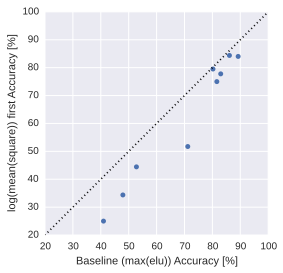

In [16]:
params=dict(first_nonlin='$square',
                 first_pool_mode='average_exc_pad', first_pool_nonlin='$safe_log',
                high_cut_hz=None, num_filters_time=25, filter_time_length=10,
                later_pool_mode='max',  layers='$deep_5', **default_params)
ResultPrinter(folder).print_results(params=params)

misclasses_square_mean_log = extract_single_group_misclasses_sorted(folder,
    params=params)

show_results(misclasses_baseline, misclasses_square_mean_log, second_name='log(mean(square)) first')

#### log(mean((square))) everywhere

Printing results in data/models/paper/bci-competition//cnt/deep4/:


Dataset-Averaged Results:

Terminal Table

id  files  time     std      test_sample  std     test    std     train_sample  std     train   std     valid_sample  std     valid   std     
0   9      0:13:23  0:11:16  32.55%       14.64%  33.53%  17.25%  43.29%        28.94%  44.95%  29.53%  42.82%        27.52%  46.06%  27.93%  

Markdown Table

|id|files|time|std|test_sample|std|test|std|train_sample|std|train|std|valid_sample|std|valid|std|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|0|9|0:13:23|0:11:16|32.55%|14.64%|33.53%|17.25%|43.29%|28.94%|44.95%|29.53%|42.82%|27.52%|46.06%|27.93%|
|Baseline (max(elu))|log(mean(square)) all|Diff|Std|Perm|
|-|
|70.3|33.5|-36.8|20.2|0.001953|


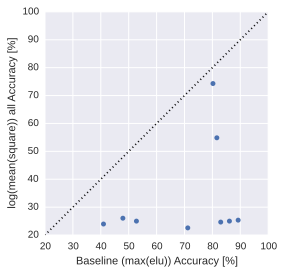

In [15]:
# Shallow net with sqrt(mean) pooling and square
params=dict(first_nonlin='$square',
                 first_pool_mode='average_exc_pad', later_nonlin='$square',
                 later_pool_mode='average_exc_pad',
                high_cut_hz=None, num_filters_time=25, filter_time_length=10,
           **default_params)
ResultPrinter(folder).print_results(params=params)
misclasses_square_mean_log_all = extract_single_group_misclasses_sorted(folder,
    params=params)


show_results(misclasses_baseline, misclasses_square_mean_log_all, second_name='log(mean(square)) all')

#### log(max(square))

Printing results in data/models/paper/bci-competition//cnt/deep4/:


Dataset-Averaged Results:

Terminal Table

id  files  time     std      test_sample  std     test    std     train_sample  std    train   std    valid_sample  std    valid   std    
0   9      0:15:51  0:06:05  57.60%       15.59%  61.61%  17.45%  93.63%        5.63%  97.84%  4.16%  90.31%        6.11%  95.87%  4.99%  

Markdown Table

|id|files|time|std|test_sample|std|test|std|train_sample|std|train|std|valid_sample|std|valid|std|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|0|9|0:15:51|0:06:05|57.60%|15.59%|61.61%|17.45%|93.63%|5.63%|97.84%|4.16%|90.31%|6.11%|95.87%|4.99%|
|Baseline (max(elu))|log(max(square)) first|Diff|Std|Perm|
|-|
|70.3|61.6|-8.7|5.3|0.003906|


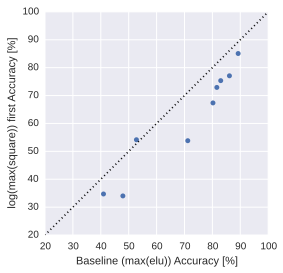

In [17]:
params=dict(first_nonlin='$square',
                 first_pool_mode='max', num_filters_time=25, filter_time_length=10,
                later_pool_nonlin='$identity', **default_params)
ResultPrinter(folder).print_results(params=params)
misclasses_square_max_log = extract_single_group_misclasses_sorted(folder,
    params=params)


show_results(misclasses_baseline, misclasses_square_max_log, second_name='log(max(square)) first')

#### log(max(square)) all layers

Printing results in data/models/paper/bci-competition//cnt/deep4/:


Dataset-Averaged Results:

Terminal Table

id  files  time     std      test_sample  std    test    std    train_sample  std     train   std     valid_sample  std     valid   std     
0   9      0:10:42  0:06:18  28.28%       7.05%  29.24%  7.77%  34.58%        23.08%  35.42%  22.89%  37.49%        22.03%  43.23%  20.73%  

Markdown Table

|id|files|time|std|test_sample|std|test|std|train_sample|std|train|std|valid_sample|std|valid|std|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|0|9|0:10:42|0:06:18|28.28%|7.05%|29.24%|7.77%|34.58%|23.08%|35.42%|22.89%|37.49%|22.03%|43.23%|20.73%|
|Baseline (max(elu))|log(max(square)) all|Diff|Std|Perm|
|-|
|70.3|29.2|-41.1|15.6|0.001953|


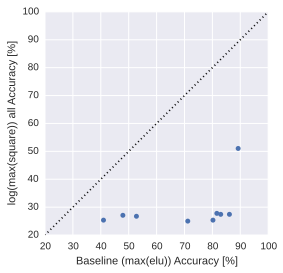

In [18]:
params=dict(first_nonlin='$square',
                 first_pool_mode='max', num_filters_time=25, filter_time_length=10,
                later_pool_mode='max', later_pool_nonlin='$safe_log', **default_params)
ResultPrinter(folder).print_results(params=params)
misclasses_square_max_log_all = extract_single_group_misclasses_sorted(folder,
    params=params)

show_results(misclasses_baseline, misclasses_square_max_log_all, second_name='log(max(square)) all')

## Dropout

Printing results in data/models/paper/bci-competition//cnt/deep4/:


Dataset-Averaged Results:

Terminal Table

id  files  time     std      test_sample  std     test    std     train_sample  std    train   std    valid_sample  std    valid    std    
0   9      0:16:10  0:05:45  55.19%       13.08%  63.00%  15.31%  99.16%        2.37%  99.96%  0.11%  98.81%        3.36%  100.00%  0.00%  

Markdown Table

|id|files|time|std|test_sample|std|test|std|train_sample|std|train|std|valid_sample|std|valid|std|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|0|9|0:16:10|0:05:45|55.19%|13.08%|63.00%|15.31%|99.16%|2.37%|99.96%|0.11%|98.81%|3.36%|100.00%|0.00%|
|Dropout|No Dropout|Diff|Std|Perm|
|-|
|70.3|63.0|-7.3|3.8|0.001953|


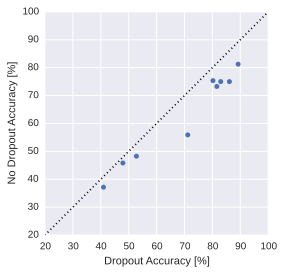

In [50]:
params=dict(layers='$deep_5', filter_time_length=10,drop_prob=0.0,
                batch_norm=True, **default_params)

ResultPrinter(folder).print_results(params=params)

misclasses_no_drop = extract_single_group_misclasses_sorted(folder,
     params=params)

show_results(misclasses_baseline, misclasses_no_drop, 'Dropout', 'No Dropout')

## Batch Norm

Printing results in data/models/paper/bci-competition//cnt/deep4/:


Dataset-Averaged Results:

Terminal Table

id  files  time     std      test_sample  std     test    std     train_sample  std     train   std     valid_sample  std     valid   std     
0   9      0:13:35  0:05:23  59.26%       17.22%  65.59%  18.53%  88.38%        22.42%  90.70%  20.26%  88.18%        21.34%  92.27%  15.31%  

Markdown Table

|id|files|time|std|test_sample|std|test|std|train_sample|std|train|std|valid_sample|std|valid|std|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|0|9|0:13:35|0:05:23|59.26%|17.22%|65.59%|18.53%|88.38%|22.42%|90.70%|20.26%|88.18%|21.34%|92.27%|15.31%|
|Batch Norm|No Batch Norm|Diff|Std|Perm|
|-|
|70.3|65.6|-4.7|10.0|0.105469|


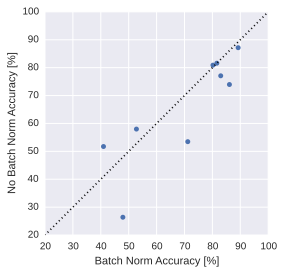

In [51]:
params=dict(layers='$deep_5', filter_time_length=10,
                batch_norm=False, drop_prob=0.5, split_first_layer=True, **default_params)
ResultPrinter(folder).print_results(params=params, constants=False)

misclasses_no_bnorm = extract_single_group_misclasses_sorted(folder,
     params=params)
show_results(misclasses_baseline, misclasses_no_bnorm, 'Batch Norm', 'No Batch Norm')

### No Batch Norm No Dropout

Printing results in data/models/paper/bci-competition//cnt/deep4/:


Dataset-Averaged Results:

Terminal Table

id  files  time     std      test_sample  std     test    std     train_sample  std    train   std    valid_sample  std     valid   std    
0   9      0:09:25  0:03:13  54.81%       12.85%  62.11%  14.25%  95.67%        7.23%  98.11%  4.01%  93.17%        11.13%  96.45%  6.73%  

Markdown Table

|id|files|time|std|test_sample|std|test|std|train_sample|std|train|std|valid_sample|std|valid|std|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|0|9|0:09:25|0:03:13|54.81%|12.85%|62.11%|14.25%|95.67%|7.23%|98.11%|4.01%|93.17%|11.13%|96.45%|6.73%|
|Dropout + Batch Norm|No Dropout No Batch Norm|Diff|Std|Perm|
|-|
|70.3|62.1|-8.2|11.2|0.041016|


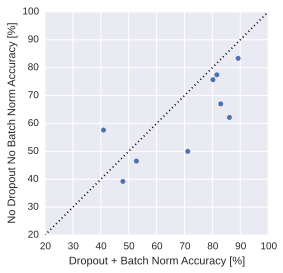

In [80]:
params=dict(layers='$deep_5', filter_time_length=10,
                batch_norm=False, drop_prob=0.0, split_first_layer=True, **default_params)
ResultPrinter(folder).print_results(params=params, constants=False)

misclasses_no_bnorm_no_drop = extract_single_group_misclasses_sorted(folder,
     params=params)
show_results(misclasses_baseline, misclasses_no_bnorm_no_drop, 'Dropout + Batch Norm', 'No Dropout No Batch Norm')

## Tied Loss

Printing results in data/models/paper/bci-competition//cnt/deep4/:


Dataset-Averaged Results:

Terminal Table

id  files  time     std      test_sample  std     test    std     train_sample  std    train   std    valid_sample  std    valid   std    
0   9      0:23:26  0:06:51  64.77%       15.13%  70.06%  16.13%  98.78%        2.21%  99.77%  0.65%  97.44%        4.78%  98.65%  3.81%  

Markdown Table

|id|files|time|std|test_sample|std|test|std|train_sample|std|train|std|valid_sample|std|valid|std|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|0|9|0:23:26|0:06:51|64.77%|15.13%|70.06%|16.13%|98.78%|2.21%|99.77%|0.65%|97.44%|4.78%|98.65%|3.81%|
|Tied Loss + Crossentropy|Only Crossentropy|Diff|Std|Perm|
|-|
|70.3|70.1|-0.3|4.6|0.431641|


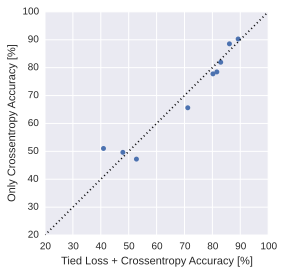

In [54]:
params=dict(layers='$deep_5', filter_time_length=10,
                 loss_expression='$categorical_crossentropy', split_first_layer=True, **default_params)
ResultPrinter(folder).print_results(params=params)

misclasses_no_tied_loss = extract_single_group_misclasses_sorted(folder, params=params)
show_results(misclasses_baseline, misclasses_no_tied_loss, 'Tied Loss + Crossentropy', 'Only Crossentropy')

### Split Convolution

Printing results in data/models/paper/bci-competition//cnt/deep4/:


Dataset-Averaged Results:

Terminal Table

id  files  time     std      test_sample  std     test    std     train_sample  std    train   std    valid_sample  std    valid   std    
0   9      0:28:01  0:07:16  65.39%       15.79%  71.33%  17.30%  98.25%        1.01%  99.96%  0.11%  96.75%        1.50%  99.66%  0.95%  

Markdown Table

|id|files|time|std|test_sample|std|test|std|train_sample|std|train|std|valid_sample|std|valid|std|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|0|9|0:28:01|0:07:16|65.39%|15.79%|71.33%|17.30%|98.25%|1.01%|99.96%|0.11%|96.75%|1.50%|99.66%|0.95%|
|Split first Convolution|Single Convolution|Diff|Std|Perm|
|-|
|70.3|71.3|1.0|1.4|0.048828|


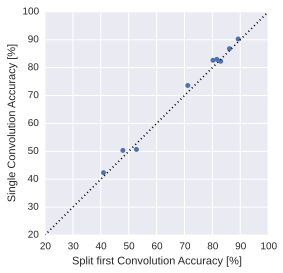

In [63]:
params=dict(layers='$deep_5', filter_time_length=10, split_first_layer=False,
            tag='after_improvement', **default_params)
ResultPrinter(folder).print_results(params=params)
misclasses_no_split_first = extract_single_group_misclasses_sorted(folder, params=params)

show_results(misclasses_baseline, misclasses_no_split_first, "Split first Convolution", "Single Convolution")

### Split Convs

Printing results in data/models/paper/bci-competition//cnt/deep4/:


Dataset-Averaged Results:

Terminal Table

id  files  time     std      test_sample  std     test    std     train_sample  std    train   std    valid_sample  std    valid    std    
0   9      0:33:02  0:07:48  64.91%       15.30%  69.60%  17.01%  97.66%        1.93%  99.92%  0.22%  96.57%        2.98%  100.00%  0.00%  

Markdown Table

|id|files|time|std|test_sample|std|test|std|train_sample|std|train|std|valid_sample|std|valid|std|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|0|9|0:33:02|0:07:48|64.91%|15.30%|69.60%|17.01%|97.66%|1.93%|99.92%|0.22%|96.57%|2.98%|100.00%|0.00%|
|10x1 filters|6x6 filters|Diff|Std|Perm|
|-|
|70.3|69.6|-0.7|8.9|0.421875|


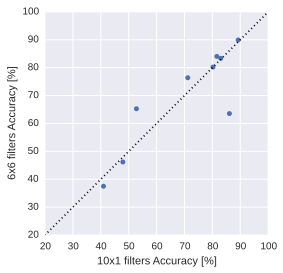

In [76]:
params=dict(layers='$deep_5', filter_time_length=6, batch_norm=True,
            split_first_layer=True, **default_params)
ResultPrinter(folder).print_results(params=params, sets=False)
misclasses_split_all_convs = extract_single_group_misclasses_sorted(folder, params=params)

show_results(misclasses_baseline, misclasses_split_all_convs, first_name='10x1 filters',
             second_name='6x6 filters')

## To remove: check of double time deep 5 and larger shallow

### ours deep5

In [313]:
ResultPrinter('data/models/paper/ours/cnt/deep4/').print_results(individual_datasets=False,
                                                                        constants=False,
     params=dict(resample_fs=250, layers='$deep_5', filter_time_length=6))

Printing results in data/models/paper/ours/cnt/deep4/:


Dataset-Averaged Results:

Terminal Table

id  files  time     std      test_sample  std    test    std    train_sample  std    train   std    valid_sample  std    valid   std    
0   20     1:05:31  0:25:02  87.09%       8.95%  90.38%  8.67%  98.94%        1.40%  99.78%  0.49%  98.40%        2.13%  99.51%  1.39%  

Markdown Table

|id|files|time|std|test_sample|std|test|std|train_sample|std|train|std|valid_sample|std|valid|std|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|0|20|1:05:31|0:25:02|87.09%|8.95%|90.38%|8.67%|98.94%|1.40%|99.78%|0.49%|98.40%|2.13%|99.51%|1.39%|


|Baseline|DoubleTime|Diff|Std|Perm|
|-|
|89.4|90.4|1.0|3.2|0.099968|


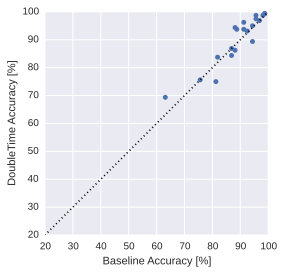

In [321]:
double_time_deep_5 = extract_single_group_misclasses('data/models/paper/ours/cnt/deep4/',
        params=dict(resample_fs=250, layers='$deep_5', filter_time_length=6))

show_results(misclasses_baseline, double_time_deep_5, 'Baseline', 'DoubleTime')

### bci deep 5

In [324]:
ResultPrinter('data/models/paper/bci-competition//cnt/deep4/').print_results(individual_datasets=False,
                                                                        constants=False,
     params=dict(resample_fs=250, layers='$cnt_4l', cnt_preprocessors='$resample_highpass_standardize',
                low_cut_off_hz='null', pool_mode='max', num_filters_time=25))
baseline_deep_5_bcic = extract_single_group_misclasses('data/models/paper/bci-competition//cnt/deep4/',
        params=dict(resample_fs=250, layers='$cnt_4l', cnt_preprocessors='$resample_highpass_standardize',
                low_cut_off_hz='null', pool_mode='max', num_filters_time=25))

Printing results in data/models/paper/bci-competition//cnt/deep4/:


Dataset-Averaged Results:

Terminal Table

id  files  time     std      test_sample  std     test    std     train_sample  std    train   std    valid_sample  std    valid   std    
0   9      0:17:06  0:04:20  65.31%       17.69%  70.95%  19.47%  97.82%        1.90%  99.88%  0.23%  96.22%        2.96%  98.99%  2.02%  

Markdown Table

|id|files|time|std|test_sample|std|test|std|train_sample|std|train|std|valid_sample|std|valid|std|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|0|9|0:17:06|0:04:20|65.31%|17.69%|70.95%|19.47%|97.82%|1.90%|99.88%|0.23%|96.22%|2.96%|98.99%|2.02%|


|Baseline|DoubleTime|Diff|Std|Perm|
|-|
|70.9|71.8|0.9|5.9|0.343750|


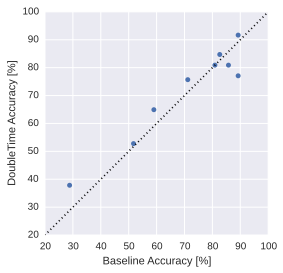

In [325]:
double_time_deep_5_bcic = extract_single_group_misclasses('data/models/paper/bci-competition//cnt/deep4/',
        params=dict(resample_fs=250, layers='$deep_5', filter_time_length=6))

show_results(baseline_deep_5_bcic, double_time_deep_5_bcic, 'Baseline', 'DoubleTime')

### Shallow Ours

|Ours shallow baseline|Ours shallow final len 32|Diff|Std|Perm|
|-|
|87.9|87.7|-0.2|1.8|0.359520|


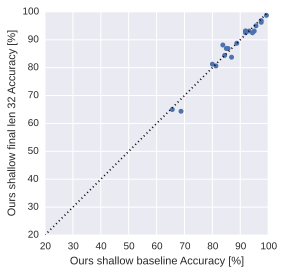

In [347]:
shallow_ours_baseline = extract_single_group_misclasses_sorted('data/models/paper/ours/cnt/shallow/',
    params=dict(resample_fs=250, loss_expression='$tied_neighbours',
               cnt_preprocessors='$resample_highpass_standardize',
               layers='$cnt_shallow_square', first_nonlin='$square',
               low_cut_off_hz='null', post_pool_nonlin='$safe_log',
               pool_mode='average_exc_pad', final_dense_length=30,
               drop_p=None, high_cut_hz='undefined'))
shallow_ours_32_len = extract_single_group_misclasses_sorted('data/models/paper/ours/cnt/shallow/',
    params=dict(resample_fs=250, loss_expression='$tied_neighbours',
               cnt_preprocessors='$resample_highpass_standardize',
               layers='$cnt_shallow_square', first_nonlin='$square',
               low_cut_off_hz='null', post_pool_nonlin='$safe_log',
               pool_mode='average_exc_pad', drop_p=0.5, final_dense_length=32))

show_results(shallow_ours_baseline, shallow_ours_32_len, 
             first_name='Ours shallow baseline', second_name='Ours shallow final len 32')

### Shallow BCIC

|BCIC shallow baseline|BCIC shallow final len 32|Diff|Std|Perm|
|-|
|74.4|72.5|-1.9|2.3|0.019531|


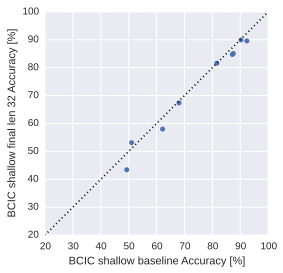

In [309]:
shallow_bcic_baseline = extract_single_group_misclasses('data/models/paper/bci-competition//cnt/shallow/',
     params=dict(resample_fs=250, loss_expression='$tied_neighbours',
               cnt_preprocessors='$resample_highpass_standardize',
               layers='$cnt_shallow_square', first_nonlin='$square',
               low_cut_off_hz='null', post_pool_nonlin='$safe_log',
               pool_mode='average_exc_pad', drop_p=None))
shallow_bcic_32_len = extract_single_group_misclasses('data/models/paper/bci-competition//cnt/shallow/',
     params=dict(resample_fs=250, loss_expression='$tied_neighbours',
               cnt_preprocessors='$resample_highpass_standardize',
               layers='$cnt_shallow_square', first_nonlin='$square',
               low_cut_off_hz='null', post_pool_nonlin='$safe_log',
               pool_mode='average_exc_pad', drop_p=0.5, final_dense_length=32))

show_results(shallow_bcic_baseline, shallow_bcic_32_len, 
             first_name='BCIC shallow baseline', second_name='BCIC shallow final len 32')